In [0]:
!pip install pyramid-arima

In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from numpy import array
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randint
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from matplotlib import pyplot
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from pyramid.arima import auto_arima

py.init_notebook_mode(connected=True)

%matplotlib inline

Using TensorFlow backend.


In [0]:
!git clone https://gitlab.com/MorfiMen/predictorofforeigncurrencies.git data_new

fatal: destination path 'data_new' already exists and is not an empty directory.


In [0]:
df = pd.read_csv('../content/data_new/data/data.csv')

In [0]:
df.head(10)

Date  Inflation        CPI   PPI  External_debt      RRM
0  24/02/2007   0.052468  62.525892  0.69          37.21  2216.57
1  25/02/2007   0.052468  62.525892  0.71          37.21  2216.57
2  26/02/2007   0.052468  62.525892  0.70          37.21  2216.57
3  27/02/2007   0.052468  62.525892  0.71          37.21  2211.46
4  28/02/2007   0.052468  62.525892  0.70          37.21  2224.12
5  01/03/2007   0.057805  63.284330  0.70          37.21  2231.94
6  02/03/2007   0.057805  63.284330  0.69          37.21  2246.88
7  03/03/2007   0.057805  63.284330  0.71          37.21  2242.62
8  04/03/2007   0.057805  63.284330  0.71          37.21  2242.62
9  05/03/2007   0.057805  63.284330  0.74          37.21  2242.62

In [0]:
df['Date'] = pd.to_datetime(df.Date,format='%d/%m/%Y')
df.index = df['Date']

In [0]:
plt.figure(figsize=(16,8))
plt.plot(df['RRM'], label='Dollar Exchange')

In [0]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'RRM'])

In [0]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['RRM'][i] = data['RRM'][i]

In [0]:
#splitting into train and validation
train = new_data[:4000]
valid = new_data[4000:]

In [0]:
new_data.shape, train.shape, valid.shape

((4385, 2), (4000, 2), (385, 2))

In [0]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2007-02-24 00:00:00'),
 Timestamp('2018-02-05 00:00:00'),
 Timestamp('2018-02-06 00:00:00'),
 Timestamp('2019-02-25 00:00:00'))

In [0]:
#make predictions
preds = []
for i in range(0,385):
    a = train['RRM'][len(train)-385+i:].sum() + sum(preds)
    b = a/385
    preds.append(b)

In [0]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['RRM'])-preds),2)))
rms

158.38541457660762

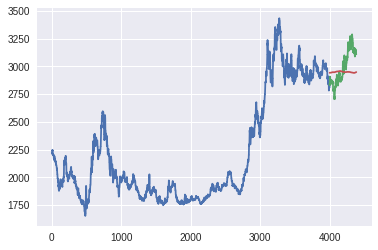

In [0]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['RRM'])
plt.plot(valid[['RRM', 'Predictions']])

In [0]:
data = df.sort_index(ascending=True, axis=0)

train = data[:4000]
valid = data[4000:]

training = train['RRM']
validation = valid['RRM']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=385)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=33358.351, BIC=33389.805, Fit time=22.196 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=36041.430, BIC=36054.012, Fit time=0.405 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=34967.938, BIC=34993.102, Fit time=8.507 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=33356.541, BIC=33381.705, Fit time=13.011 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=33357.667, BIC=33389.121, Fit time=15.715 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=35985.756, BIC=36004.629, Fit time=1.145 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=33357.618, BIC=33389.072, Fit time=55.550 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=33360.991, BIC=33398.735, Fit time=46.356 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=33427.046, BIC=33445.919, Fit time=11.015 seconds
Fit 

In [0]:
rms=np.sqrt(np.mean(np.power((np.array(valid['RRM'])-np.array(forecast['Prediction'])),2)))
rms

103.65634909749473

In [0]:
plt.plot(train['RRM'])
plt.plot(valid['RRM'])
plt.plot(forecast['Prediction'])

In [0]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'RRM'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['RRM'][i] = data['RRM'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:4000,:]
valid = dataset[4000:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 385 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 202s - loss: 0.0010


In [0]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

24.607551609981158

Date
2018-02-06    2844.058838
2018-02-07    2847.643311
2018-02-08    2851.542969
2018-02-09    2851.268799
2018-02-10    2857.261230
2018-02-11    2875.252686
2018-02-12    2893.612305
2018-02-13    2908.049316
2018-02-14    2916.366943
2018-02-15    2920.204590
2018-02-16    2918.857666
2018-02-17    2904.758301
2018-02-18    2889.445801
2018-02-19    2876.899902
2018-02-20    2868.393066
2018-02-21    2863.666260
2018-02-22    2863.967773
2018-02-23    2870.285156
2018-02-24    2877.435059
2018-02-25    2876.746094
2018-02-26    2873.363770
2018-02-27    2869.499512
2018-02-28    2866.322510
2018-03-01    2865.603271
2018-03-02    2868.943848
2018-03-03    2875.825195
2018-03-04    2882.553955
2018-03-05    2887.719727
2018-03-06    2891.013916
2018-03-07    2887.766357
                 ...     
2019-01-27    3155.898682
2019-01-28    3159.356445
2019-01-29    3160.689453
2019-01-30    3165.114746
2019-01-31    3166.653809
2019-02-01    3168.333984
2019-02-02    3157.230957
2019-02

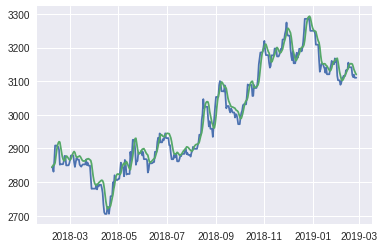

In [0]:
#for plotting
train = new_data[:4000]
valid = new_data[4000:]
valid['Predictions'] = closing_price
#plt.plot(train['RRM'])
plt.plot(valid[['RRM','Predictions']])
valid['Predictions']

In [0]:
from keras.models import load_model
model = load_model("../content/tmp_model.h5")

cp = model.predict(X_test)
cp = scaler.inverse_transform(cp)
v = new_data[4000:]
v['Predictions'] = cp
v = v.rename(columns={'Date':'USD Price'})
v = v.to_json(orient='table')
v
#plt.plot(v[['Predictions']])

'{"schema": {"fields":[{"name":"Date","type":"datetime"},{"name":"RRM","type":"string"},{"name":"Predictions","type":"number"}],"primaryKey":["Date"],"pandas_version":"0.20.0"}, "data": [{"Date":"2018-02-06T00:00:00.000Z","RRM":2843.6,"Predictions":2834.2495117188},{"Date":"2018-02-07T00:00:00.000Z","RRM":2844.83,"Predictions":2837.720703125},{"Date":"2018-02-08T00:00:00.000Z","RRM":2830.89,"Predictions":2841.8615722656},{"Date":"2018-02-09T00:00:00.000Z","RRM":2862.78,"Predictions":2840.6896972656},{"Date":"2018-02-10T00:00:00.000Z","RRM":2908.7,"Predictions":2847.3920898438},{"Date":"2018-02-11T00:00:00.000Z","RRM":2908.7,"Predictions":2869.4965820312},{"Date":"2018-02-12T00:00:00.000Z","RRM":2908.7,"Predictions":2891.6826171875},{"Date":"2018-02-13T00:00:00.000Z","RRM":2904.29,"Predictions":2907.48046875},{"Date":"2018-02-14T00:00:00.000Z","RRM":2904.71,"Predictions":2914.1110839844},{"Date":"2018-02-15T00:00:00.000Z","RRM":2895.79,"Predictions":2914.37890625},{"Date":"2018-02-16T00